# SVM

Made by **Arthur Douillard**.

All the implementation code for this notebook can be found in the *.py* files in the tarball.

In [113]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import itertools
import random
import math

from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
from sklearn.datasets import fetch_mldata

from svm import My_SVM
from data_gen import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Linear SVM

## 1.1. Very Tiny Toy

In [34]:
X = np.array([1, 2, 3]).reshape(3, 1)
y = np.array([-1, 1, 1])

X

array([[1],
       [2],
       [3]])

In [35]:
svm = My_SVM(kernel='linear')
svm.train(X, y)

print('\nExpected labels:\t', labels)
print('Predicted labels:\t', svm.process(X))
print('Lagrange coefficient:\t', svm.lagrange_coeffs())
print('Bias:\t\t\t', svm.bias_get())
print('Weights:\t\t', svm.weights_get())
print('Accuracy:\t\t', svm.score(X, y))

     pcost       dcost       gap    pres   dres
 0: -1.1111e+00 -2.4444e+00  5e+00  2e+00  2e+00
 1: -2.0801e+00 -2.0579e+00  1e-01  1e-01  1e-01
 2: -2.0000e+00 -2.0008e+00  2e-03  9e-04  9e-04
 3: -2.0000e+00 -2.0000e+00  2e-05  9e-06  9e-06
 4: -2.0000e+00 -2.0000e+00  2e-07  9e-08  9e-08
Optimal solution found.

Expected labels:	 [-1  1  1]
Predicted labels:	 [-1.  1.  1.]
Lagrange coefficient:	 [array([ 1.99999986,  1.99999986,  0.        ])]
Bias:			 [-2.9999997950623092]
Weights:		 [array([ 1.99999986])]
Accuracy:		 1.0


## 1.2. Hard Margin

Score: 1.0


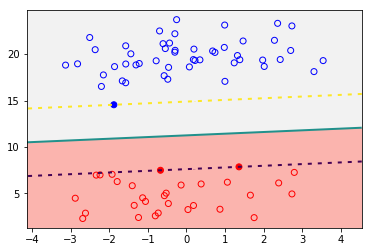

In [57]:
X, y = two_borders()

svm = My_SVM(kernel='linear', verbose=False)
svm.train(X, y)
print('Score:', svm.score(X, y))

svm.print_2Ddecision()

## 1.3. Soft Margin

In [54]:
X, y = two_borders(noise=0.9)

svm = My_SVM(kernel='linear', verbose=False)
svm.train(X, y)

No optimal solution found.


It appears that we cannot solve this problem with a **hard-margin svm** due to the noise, no optimal solution have been found. To be able to produce a separator for this noisy dataset, we need to use a **soft-margin SVM**.

Score: 0.9


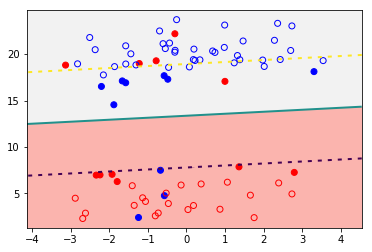

In [56]:
X, y = two_borders(noise=0.9)

svm = My_SVM(kernel='linear', verbose=False, C=0.8)
svm.train(X, y)
print('Score:', svm.score(X, y))

svm.print_2Ddecision()

# 2. Multiclass SVM

## 2.1. One-Against-Rest

Score: 1.0


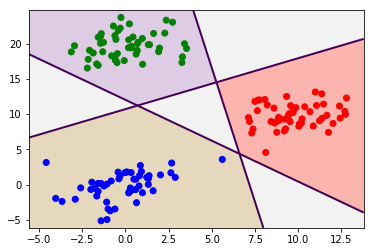

In [99]:
X, y = multiclass_triangle()

svm = My_SVM(kernel='linear', multiclass='oar', verbose=False)
svm.train(X, y)

print('Score:', svm.score(X, y))

svm.print_2Ddecision(levels=[0])

No optimal solution found.
Score: 0.666666666667


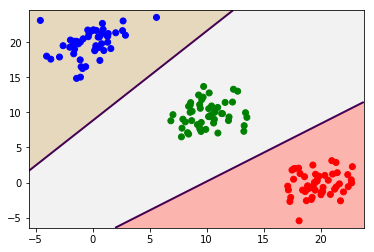

In [100]:
X, y = multi_aligned()

svm = My_SVM(kernel='linear', multiclass='oar', verbose=False)
svm.train(X, y)

print('Score:', svm.score(X, y))

svm.print_2Ddecision(levels=[0])

## 2.2. One-Against-One

Score: 1.0


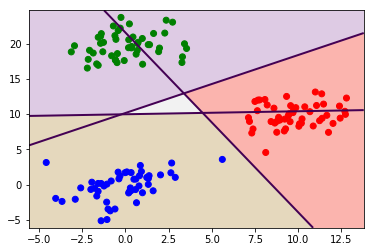

In [104]:
X, y = multiclass_triangle()

svm = My_SVM(kernel='linear', multiclass='oao', verbose=False)
svm.train(X, y)

print('Score:', svm.score(X, y))

svm.print_2Ddecision(levels=[0])

Score: 1.0


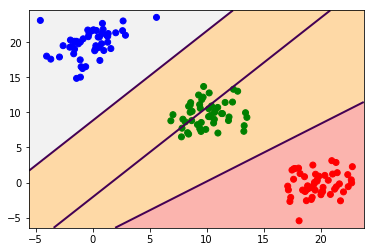

In [105]:
X, y = multi_aligned()

svm = My_SVM(kernel='linear', multiclass='oao', verbose=False)
svm.train(X, y)

print('Score:', svm.score(X, y))

svm.print_2Ddecision(levels=[0])

# 3. Kernels

## 3.1. XOR

Score: 1.0


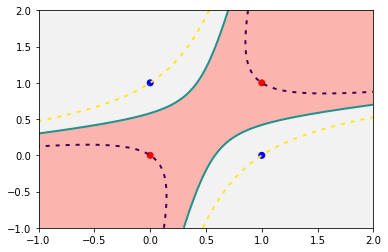

In [106]:
xor_x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_y = np.array([-1, 1, 1, -1])

svm = My_SVM(kernel='poly', hyper=2, verbose=False)
svm.train(xor_x, xor_y)

print('Score:', svm.score(xor_x, xor_y))

svm.print_2Ddecision()

Score: 1.0


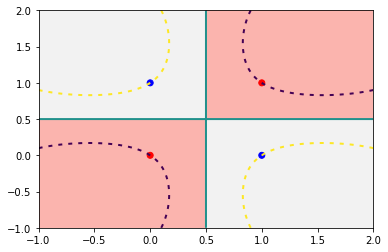

In [107]:
xor_x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_y = np.array([-1, 1, 1, -1])

svm = My_SVM(kernel='rbf', hyper=1, verbose=False)
svm.train(xor_x, xor_y)

print('Score:', svm.score(xor_x, xor_y))

svm.print_2Ddecision()

## 3.2. Two Moons

1.0


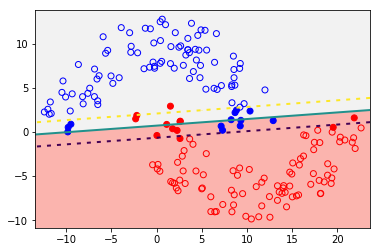

In [209]:
X, y = gen_two_moons(-3, 100, gaussian_noise=False)

svm = My_SVM(kernel='linear', C=0.8, verbose=False)
svm.train(X, y)

print(svm_moon.score(X, y))

svm.print_2Ddecision()

0.985


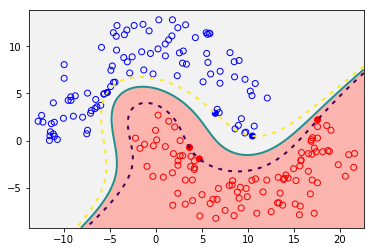

In [108]:
X, y = gen_two_moons(-3, 100, gaussian_noise=False)

svm = My_SVM(kernel='poly', hyper=3, verbose=False)
svm.train(X, y)

print(svm_moon.score(X, y))

svm.print_2Ddecision()

0.98


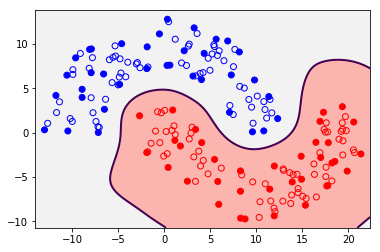

In [125]:
X, y = gen_two_moons(-3, 100, gaussian_noise=False)

svm = My_SVM(kernel='rbf', hyper=2, verbose=False)
svm.train(X, y)

print(svm_moon.score(X, y))

svm.print_2Ddecision(levels=[0])

# 4. Kernel PCA

In [175]:
from kernel_pca import My_KernelPCA

## 4.1. Two Moons

In [177]:
eigvecs[:, :2].shape

(200, 2)

Score: 1.0


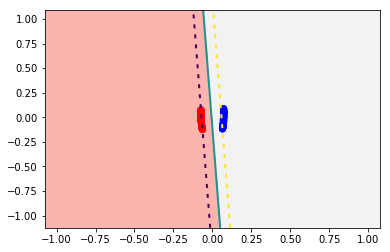

In [179]:
X, y = gen_two_moons(-3, 100, gaussian_noise=False)

k = My_KernelPCA(hyper=30)
eigvecs = k.fit(X, y, axis=2)

svm = My_SVM(kernel='linear', verbose=False)
svm.train(eigvecs, y)

print('Score:', svm.score(eigvecs, y))

svm.print_2Ddecision()

## 4.2. Mnist

In [205]:
mnist = fetch_mldata('MNIST original')

indexes = np.random.permutation(mnist.data.shape[0])

X, y = mnist.data[indexes, :][:1000, :], mnist.target[indexes][:1000]
X.shape, y.shape

((1000, 784), (1000,))

In [ ]:
svm = My_SVM(kernel='linear', C=0.5, verbose=False)
svm.train(X[:, :40], y)
print('Score:', svm.score(X[:, :40], y))

In [208]:
k = My_KernelPCA(hyper=15)
eigvecs = k.fit(X, y, axis=20)

svm = My_SVM(kernel='linear', C=0.5, verbose=False)
svm.train(eigvecs, y)
print('Score:', svm.score(eigvecs, y))

Score: 0.533


/Users/arthur/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


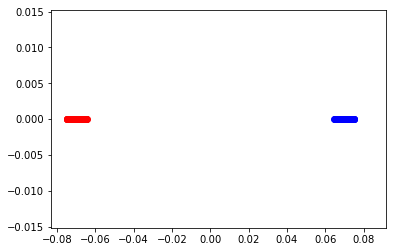

In [172]:
plt.scatter(eigvec[y==-1, 0], np.zeros((100, 1)), color='blue')
plt.scatter(eigvec[y==1, 0], np.zeros((100, 1)), color='red')

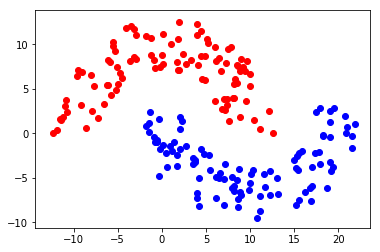

In [168]:
plt.scatter(X[y==-1, 0], X[y==-1, 1], color='blue')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red')

In [129]:
eigvec.shape

(200, 200)